# <center> Speech & Natural Language Processing </center>
# <center> Assignment - 3 - Dependency Parsing </center>

##  Suyash Damle
## 15CS10057

In [1]:
import numpy as np
from nltk.parse import DependencyGraph, DependencyEvaluator,TransitionParser
from nltk.parse.transitionparser import Transition, Configuration, TransitionParser
from nltk.corpus.reader.conll import ConllCorpusReader

In [2]:
graphs_list = DependencyGraph.load('hi-ud-train.conllu')
graphs_list_test=DependencyGraph.load('hi-ud-test.conllu')

/home/suyash/anaconda2/envs/py36/lib/python3.6/site-packages/nltk/parse/dependencygraph.py:380: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node "


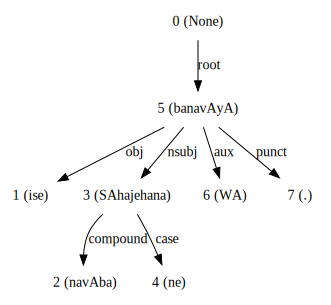

In [3]:
graphs_list[1]



# Summary of Performances of all models in my run:

### After running all models with different combinations of features and classifiers, the collected scores all as follows:

***

### The rest of the code and models follow after the table


***




| Extra Feats.(col 10)| Morphological Feats.   | Classifier |LAS(arc std)|UAS(arc std)|LAS(arc eager)|UAS(arc eager)|
|---------------------|------------------------|------------|------------|------------|--------------|--------------|
| Not Included        |     Included           | SVM        |0.862       |0.771       |0.883         |0.793         |
| Not Included        |     Included           | Log.Reg    |0.803       |0.689       |0.862         |0.752         |
| Not Included        |     Included           | MLP        |0.808       |0.696       |0.841         |0.706         |
|---------------------|------------------------|------------|------------|------------|--------------|--------------|
| Not Included        |    Not Included        | SVM        |0.849       |0.765       |0.868         |0.775         |
| Not Included        |    Not Included        | Log.Reg    |0.800       |0.692       |0.852         |0.738         |
| Not Included        |    Not Included        | MLP        |0.795       |0.683       |0.836         |0.714         |
|---------------------|------------------------|------------|------------|------------|--------------|--------------|
|     Included        |     Included           | SVM        |0.912       |0.831       |0.921         |0.826         |
|     Included        |     Included           | Log.Reg    |0.879       |0.799       |0.872         |0.774         | 
|     Included        |     Included           | MLP        |0.870       |0.751       |0.874         |0.776         |
|---------------------|------------------------|------------|------------|------------|--------------|--------------|
|     Included        |    Not Included        | SVM        |0.847       |0.763       |0.871         |0.772         | 
|     Included        |    Not Included        | Log.Reg    |0.800       |0.692       |0.852         |0.737         |
|     Included        |    Not Included        | MLP        |0.830       |0.630       |0.816         |0.696         |  
|---------------------|------------------------|------------|------------|------------|--------------|--------------|


***



***





## Loading Modified Classes:

**For the sake of allowing additional functionalities, the classes from the NLTK packages have been modified slightly. These are:**


##### *MyConfiguration & MyTransitionParser Classes from new_classes.py file*

In [4]:
#import importlib
#import new_classes
#importlib.reload(new_classes)
from new_classes import MyConfiguration,MyTransitionParser



***


## With Morphological Features

### - Default SVM Classifier

In [5]:
parser = MyTransitionParser('arc-standard')
parser.train(graphs_list,"arc-std.model",verbose=False)
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard: ",de.eval())

print()

parser = MyTransitionParser('arc-eager')
parser.train(graphs_list,"arc-eager.model",verbose=False)
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager: ",de.eval())



 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard:  (0.8624338624338624, 0.7717309145880574)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager:  (0.8828420256991686, 0.7928949357520786)


### - Logistic Regression Classifier

In [7]:
# defining model to be passed into the object
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

parser = MyTransitionParser('arc-standard')
parser.train(graphs_list,"arc-std.model",verbose=False,model=model) # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard: ",de.eval())

print()

parser = MyTransitionParser('arc-eager')
parser.train(graphs_list,"arc-eager.model",verbose=False,model=model)  # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager: ",de.eval())

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard:  (0.8034769463340892, 0.6893424036281179)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager:  (0.8624338624338624, 0.7520786092214664)


### - Multi-Layer Perceptron Model

In [17]:
# defining model to be passed into the object
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(30,15,),alpha=1e-5)

parser = MyTransitionParser('arc-standard')
parser.train(graphs_list,"arc-std.model",verbose=False,model=model) # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard: ",de.eval())

print()

parser = MyTransitionParser('arc-eager')
parser.train(graphs_list,"arc-eager.model",verbose=False,model=model)  # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager: ",de.eval())

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard:  (0.8087679516250945, 0.6961451247165533)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager:  (0.8405139833711263, 0.7059712773998488)




***


## Without Morphological Features

### - Default SVM Classifier

In [15]:
parser = MyTransitionParser('arc-standard',features_list=[])
parser.train(graphs_list,"arc-std.model",verbose=False)
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard: ",de.eval())

print()

parser = MyTransitionParser('arc-eager',features_list=[])
parser.train(graphs_list,"arc-eager.model",verbose=False)
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager: ",de.eval())



 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard:  (0.8488284202569917, 0.7656840513983371)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager:  (0.8684807256235828, 0.7747543461829176)


### - Logistic Regression Classifier

In [18]:
# defining model to be passed into the object
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

parser = MyTransitionParser('arc-standard',features_list=[])
parser.train(graphs_list,"arc-std.model",verbose=False,model=model) # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard: ",de.eval())

print()

parser = MyTransitionParser('arc-eager',features_list=[])
parser.train(graphs_list,"arc-eager.model",verbose=False,model=model)  # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager: ",de.eval())

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard:  (0.800453514739229, 0.6923658352229781)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager:  (0.8518518518518519, 0.7377173091458806)


### - Multi-Layer Perceptron Model

In [19]:
# defining model to be passed into the object
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(30,15,),alpha=1e-5)

parser = MyTransitionParser('arc-standard',features_list=[])
parser.train(graphs_list,"arc-std.model",verbose=False,model=model) # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard: ",de.eval())

print()

parser = MyTransitionParser('arc-eager',features_list=[])
parser.train(graphs_list,"arc-eager.model",verbose=False,model=model)  # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager: ",de.eval())

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard:  (0.7951625094482238, 0.6825396825396826)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager:  (0.8367346938775511, 0.7135298563869993)




***


# With Additional Features (col 10)

In [21]:
graphs_list = DependencyGraph.load('hi-ud-train_2.conllu')
graphs_list_test=DependencyGraph.load('hi-ud-test_2.conllu')

/home/suyash/anaconda2/envs/py36/lib/python3.6/site-packages/nltk/parse/dependencygraph.py:380: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node "




***


## With Morphological Features

### - Default SVM Classifier

In [22]:
parser = MyTransitionParser('arc-standard')
parser.train(graphs_list,"arc-std.model",verbose=False)
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard (col 10 features added): ",de.eval())

print()

parser = MyTransitionParser('arc-eager')
parser.train(graphs_list,"arc-eager.model",verbose=False)
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager (col 10 features added): ",de.eval())



 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard (col 10 features added):  (0.9115646258503401, 0.8306878306878307)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager (col 10 features added):  (0.9123204837490552, 0.8261526832955405)


### - Logistic Regression Classifier

In [23]:
# defining model to be passed into the object
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

parser = MyTransitionParser('arc-standard')
parser.train(graphs_list,"arc-std.model",verbose=False,model=model) # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard (col 10 features added): ",de.eval())

print()

parser = MyTransitionParser('arc-eager')
parser.train(graphs_list,"arc-eager.model",verbose=False,model=model)  # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager (col 10 features added): ",de.eval())

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard (col 10 features added):  (0.872260015117158, 0.7739984882842026)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager (col 10 features added):  (0.8972033257747544, 0.798941798941799)


### - Multi-Layer Perceptron Model

In [24]:
# defining model to be passed into the object
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(30,15,),alpha=1e-5)

parser = MyTransitionParser('arc-standard')
parser.train(graphs_list,"arc-std.model",verbose=False,model=model) # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard (col 10 features added): ",de.eval())

print()

parser = MyTransitionParser('arc-eager')
parser.train(graphs_list,"arc-eager.model",verbose=False,model=model)  # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager (col 10 features added): ",de.eval())

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard (col 10 features added):  (0.8699924414210128, 0.7513227513227513)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager (col 10 features added):  (0.8745275888133031, 0.7762660619803476)




***


## Without Morphological Features

### - Default SVM Classifier

In [25]:
parser = MyTransitionParser('arc-standard',features_list=[])
parser.train(graphs_list,"arc-std.model",verbose=False)
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard (col 10 features added): ",de.eval())

print()

parser = MyTransitionParser('arc-eager',features_list=[])
parser.train(graphs_list,"arc-eager.model",verbose=False)
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager(col 10 features added): ",de.eval())



 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard (col 10 features added):  (0.8465608465608465, 0.762660619803477)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager(col 10 features added):  (0.871504157218443, 0.7724867724867724)


### - Logistic Regression Classifier

In [26]:
# defining model to be passed into the object
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

parser = MyTransitionParser('arc-standard',features_list=[])
parser.train(graphs_list,"arc-std.model",verbose=False,model=model) # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard (col 10 features added): ",de.eval())

print()

parser = MyTransitionParser('arc-eager',features_list=[])
parser.train(graphs_list,"arc-eager.model",verbose=False,model=model)  # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager (col 10 features added): ",de.eval())

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard (col 10 features added):  (0.800453514739229, 0.6923658352229781)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager (col 10 features added):  (0.8518518518518519, 0.7377173091458806)


### - Multi-Layer Perceptron Model

In [27]:
# defining model to be passed into the object
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(30,15,),alpha=1e-5)

parser = MyTransitionParser('arc-standard',features_list=[])
parser.train(graphs_list,"arc-std.model",verbose=False,model=model) # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-std.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Standard (col 10 features added): ",de.eval())

print()

parser = MyTransitionParser('arc-eager',features_list=[])
parser.train(graphs_list,"arc-eager.model",verbose=False,model=model)  # passing model to the train function
result = parser.parse(graphs_list_test, 'arc-eager.model')
de = DependencyEvaluator(result,graphs_list_test)
print("With ARC-Eager (col 10 features added): ",de.eval())

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Standard (col 10 features added):  (0.8163265306122449, 0.6961451247165533)

 Number of training examples : 501
 Number of valid (projective) examples : 477
With ARC-Eager (col 10 features added):  (0.8299319727891157, 0.6991685563114135)
